In [1]:
from kafka import KafkaConsumer
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_validate,KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [2]:
consumer = KafkaConsumer(
    'ml-raw-dns',
    bootstrap_servers="localhost:9092",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

for m in consumer:
    print(m.value)
    break

b'"\\u00ef\\u00bb\\u061ftimestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack\\n"'


# Load the model

In [3]:
dynamic_model= static_model = pickle.load(open('Static.pkl', 'rb'))

In [4]:
static_model

DecisionTreeClassifier(max_depth=50)

# Get new dataset

In [5]:
def update_data():
    c = 0
    list_1000 = []
    for m in consumer:
        if c < 1000:
            x = m.value
            x=eval(x.decode("UTF-8"))
            x = x.strip()
            x = x.split(",")
            list_1000.append(x)
            c+=1
        else:
            break 
    data = pd.DataFrame(list_1000,columns = ['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max','labels_average', 'longest_word', 'sld', 'len', 
                                             'subdomain','Target Attack'])
    return data  

# Preprocess the data

In [6]:
def preprocessing_data(data):
    data.drop(['timestamp',"subdomain","len","sld","longest_word","upper","labels"],axis = 1,inplace =True)
    x = data.iloc[:,:-1].values
    y = data.iloc[:,-1].values
    return x,y

# Retrain the model

In [7]:
def retrain(x,y):
    pipe = Pipeline(steps=[("normalize", MinMaxScaler()), ("Static Model", dynamic_model)])
    pipe.fit(x,y)
    return pipe

In [8]:
len(m.value)

173

# Evaluating 

In [9]:
Dynmaic_recall=[]
static_recall=[]
for i in range(265):
    #create windows of 1000 datapoints
    print(f"Window: {i+1}")
    data = update_data()
    x,y = preprocessing_data(data)
    y_pred_static = static_model.predict(x)
    recall_static = recall_score(y.astype(int),y_pred_static.astype(int))
    y_pred_dynamic = dynamic_model.predict(x)
    recall_dynamic = recall_score(y.astype(int),y_pred_dynamic.astype(int))
    print(f"Recall of static model: {recall_static}")
    print(f"Recall of dynamic model: {recall_dynamic}")
    #thresholding
    if recall_dynamic<0.98:
        print("Retraining.......")
        recall_after_retrain = retrain(x,y)
        another_data = update_data()
        x_new,y_new = preprocessing_data(another_data)
        y_pred_dynamic = dynamic_model.predict(x_new)
        recall_dynamic = recall_score(y_new.astype(int),y_pred_dynamic.astype(int))
        print(f"Recall after retrain: {recall_dynamic}")
        #best of recall in both models
    Dynmaic_recall.append(recall_dynamic)
    static_recall.append(recall_static)

Window: 1
Recall of static model: 0.036053130929791274
Recall of dynamic model: 0.036053130929791274
Retraining.......
Recall after retrain: 0.998158379373849
Window: 2
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 3
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 4
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 5
Recall of static model: 0.9964601769911504
Recall of dynamic model: 0.9964601769911504
Window: 6
Recall of static model: 0.9982046678635548
Recall of dynamic model: 0.9982046678635548
Window: 7
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 8
Recall of static model: 0.9965928449744463
Recall of dynamic model: 0.9965928449744463
Window: 9
Recall of static model: 0.9982486865148862
Recall of dynamic model: 0.9982486865148862
Window: 10
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 11
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 12
Recall of static model: 0.996383363471

Recall of static model: 0.9982014388489209
Recall of dynamic model: 0.9982014388489209
Window: 105
Recall of static model: 0.99812734082397
Recall of dynamic model: 0.99812734082397
Window: 106
Recall of static model: 0.9982363315696648
Recall of dynamic model: 0.9982363315696648
Window: 107
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 108
Recall of static model: 0.9964093357271095
Recall of dynamic model: 0.9964093357271095
Window: 109
Recall of static model: 0.9982638888888888
Recall of dynamic model: 0.9982638888888888
Window: 110
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 111
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 112
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 113
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 114
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 115
Recall of static model: 0.9981785063752276
Recall of dynamic model: 0.9981785063752276
Window: 

Recall of static model: 0.9981617647058824
Recall of dynamic model: 0.9981617647058824
Window: 205
Recall of static model: 0.9980952380952381
Recall of dynamic model: 0.9980952380952381
Window: 206
Recall of static model: 0.9981785063752276
Recall of dynamic model: 0.9981785063752276
Window: 207
Recall of static model: 0.9962546816479401
Recall of dynamic model: 0.9962546816479401
Window: 208
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 209
Recall of static model: 0.998211091234347
Recall of dynamic model: 0.998211091234347
Window: 210
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 211
Recall of static model: 0.9981684981684982
Recall of dynamic model: 0.9981684981684982
Window: 212
Recall of static model: 0.998158379373849
Recall of dynamic model: 0.998158379373849
Window: 213
Recall of static model: 1.0
Recall of dynamic model: 1.0
Window: 214
Recall of static model: 0.9980842911877394
Recall of dynamic model: 0.9980842911877394
Window: 215
Recal

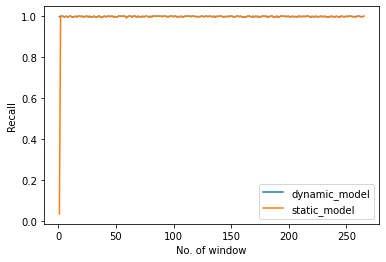

In [11]:
#plotting of recall in both dynamic and static models
plt.plot(range(1, 266), Dynmaic_recall, label='dynamic_model')
plt.plot(range(1, 266),static_recall, label='static_model')
plt.xlabel('No. of window')
#plt.xticks(range(1, 251))
plt.ylabel("Recall")
plt.legend(loc="lower right")